In [1]:
import os
import json

import torch
import result
from rnn_model import LSTMNet, GRUNet
from utils import DotDict, Logger, rmse, rmse_tensor, boolean_string, get_dir, get_time, next_dir, model_dir, get_model
from get_dataset import get_time_data, get_stnn_data
from stnn import SaptioTemporalNN
import matplotlib.pyplot as plt
from matplotlib import axis
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
%matplotlib inline


In [2]:
%load_ext autoreload
%autoreload 1
%aimport result

## Data

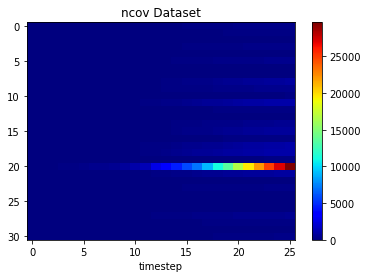

In [13]:
datadir = 'data'
dataset = 'ncov_confirmed'
data = get_time_data(datadir, dataset)

plt.figure('ncov Dataset')
plt.imshow(data.squeeze().numpy().T, aspect='auto', cmap='jet')
plt.title('ncov Dataset')
plt.xlabel('timestep')
plt.colorbar()

## Model List

In [7]:
pred_all = {}

In [13]:
folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'output', 'algorithm'))

In [14]:
stnn = result.Printer(folder)
stnn.get_df(mean=True, min=True)
stnn.min_idx()

the df is :
                        test_loss  train_loss  nhid  nlayers
Adagrad_13-18-15-03-35   0.123736    0.192517     0        1
Adam_13-15-15-03-38      0.031085    0.000367     0        1
Rmsprop_13-18-15-03-27   0.030744    0.000196     0        1
SGD_13-17-15-03-19       0.033673    0.031959     0        1


'Rmsprop_13-18-15-03-27'

## Exp 

In [4]:
exps_dir = {}

In [15]:
exps_dir['Adam'] = 'Adam_13-15-15-03-38'
exps_dir['SGD'] = 'SGD_13-17-15-03-19'
exps_dir['Adagrad'] = 'Adagrad_13-18-15-03-35'
exps_dir['Rmsprop'] = 'Rmsprop_13-18-15-03-27'

In [16]:
for k, v in exps_dir.items():
    exp = result.Exp(v, folder)
    exps_dir[k] = exp.train_loss()

d:\Jupyter_Documents\ML-code\research_code\output\algorithm
Adam_13-15-15-03-38
d:\Jupyter_Documents\ML-code\research_code\output\algorithm
SGD_13-17-15-03-19
d:\Jupyter_Documents\ML-code\research_code\output\algorithm
Adagrad_13-18-15-03-35
d:\Jupyter_Documents\ML-code\research_code\output\algorithm
Rmsprop_13-18-15-03-27


In [18]:
x = range(len(exps_dir['SGD']))

Text(0, 0.5, 'loss')

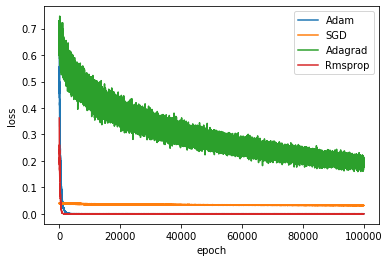

In [20]:
for exp_name, loss in exps_dir.items():
    plt.plot(x, loss, label=exp_name)
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')

In [20]:
exp_name = 'test_20-17-16-03-12'

In [23]:
exp = result.Exp(exp_name, folder)

d:\Jupyter_Documents\ML-code\research_code\output\test
test_20-17-16-03-12


In [96]:
exps_dir['stnn'] = os.path.join(folder, exp_name)

In [97]:
pred_all['stnn'] = exp.pred().numpy().T

config.json
pred_000.txt


In [24]:
pred = pred.T

([<matplotlib.axis.XTick at 0x21b06a6f3c8>],
 <a list of 1 Text xticklabel objects>)

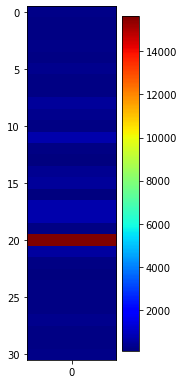

In [40]:
plt.figure(figsize=(2,6.5))
plt.imshow(pred, aspect='auto', cmap='jet')
plt.colorbar()
my_x_ticks = np.arange(0, 1, 1)
plt.xticks(my_x_ticks)

In [81]:
test_data = data[15:].squeeze().numpy().T

In [82]:
test_data.shape

(31, 11)

In [76]:
pred_all['stnn-d'].shape

(31, 11)

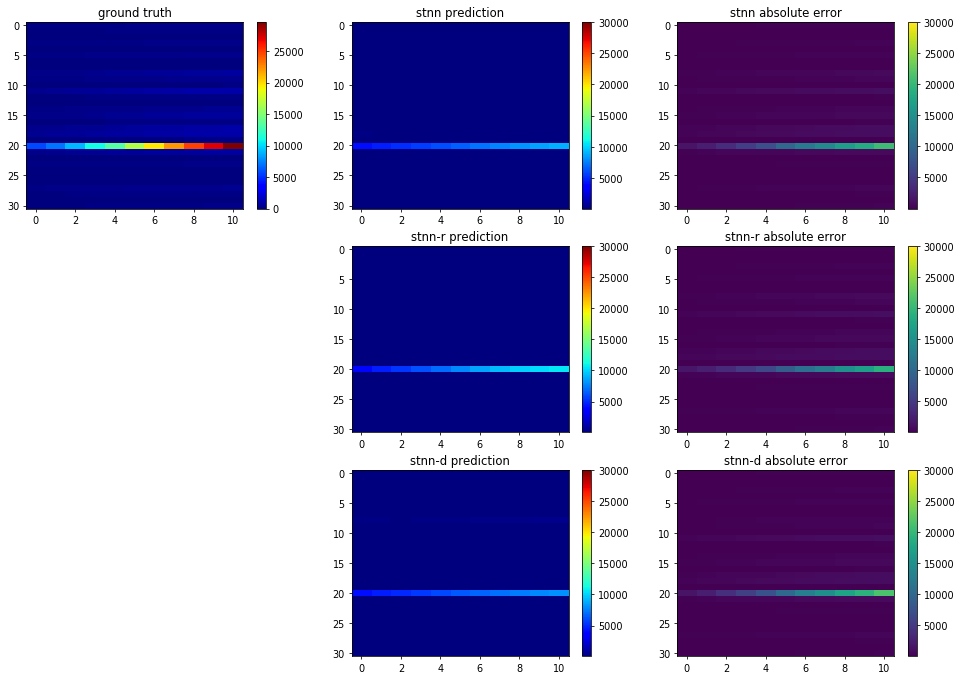

In [99]:
plt.figure('Results', figsize=(17, 12), dpi=70)

plt.subplot(3, 3, 1)
plt.imshow(test_data, aspect='auto', cmap='jet')
plt.colorbar()
plt.title('ground truth')

for i, exp in enumerate(pred_all):
    plt.subplot(3, 3, i * 3 + 2 + i // 3)
    plt.imshow(pred_all[exp], aspect='auto', cmap='jet', vmax=30000)
    plt.colorbar()
    plt.title('{} prediction'.format(exp))

    plt.subplot(3, 3, i * 3 + 3 + i // 3)
    plt.imshow(np.abs(test_data - pred_all[exp]), aspect='auto', vmax=30000)
    plt.colorbar()
    plt.title('{} absolute error'.format(exp))

In [13]:
for name, params in exp.model().named_parameters():
    print(name, params)

factors Parameter containing:
tensor([[[ 0.0099],
         [ 0.0249],
         [ 0.0392],
         ...,
         [ 0.0437],
         [-0.0005],
         [ 0.0444]],

        [[ 0.0772],
         [ 0.1556],
         [ 0.1037],
         ...,
         [ 0.1287],
         [ 0.0983],
         [ 0.0770]],

        [[ 0.0647],
         [ 0.1048],
         [ 0.1077],
         ...,
         [ 0.1034],
         [ 0.1033],
         [ 0.0688]],

        ...,

        [[ 0.0883],
         [ 0.0926],
         [ 0.1002],
         ...,
         [ 0.0303],
         [ 0.1118],
         [ 0.0669]],

        [[ 0.0490],
         [ 0.0659],
         [ 0.0504],
         ...,
         [ 0.0868],
         [ 0.0484],
         [ 0.0831]],

        [[ 0.1118],
         [ 0.0729],
         [ 0.0642],
         ...,
         [-0.0198],
         [ 0.0960],
         [ 0.0166]]], requires_grad=True)
dynamic.module.weight Parameter containing:
tensor([[-0.9505, -0.0173]], requires_grad=True)
dynamic.module.bias Paramet

In [ ]:
exp

## Aids LSTM

In [8]:
folder_name = 'aids_LSTM'
model_name = get_model(folder_name)[1]
model_list = model_dir[folder_name]

### The Best Model 

In [ ]:
for model in model_list:
    model = LSTMNet()

In [5]:
outputdir = 'output'
exps = ['stnn']
models = {}
for exp in exps:
    with open(os.path.join(outputdir, exp, 'config.json'), 'r') as f:
        config = json.load(f)
    setup, (train_input, train_output), (test_input, test_data)  = dataset_factory(datadir, dataset, 700, 5)
    model = rnn(29, config['nhid'], config['nlayers'], 29, config['seq_length'])
    state_dict = torch.load(os.path.join(outputdir, exp, 'model.pt'), map_location=lambda storage, loc: storage)
    model.load_state_dict(state_dict)
    models[exp] = model

## Results

In [6]:
predictions = {}
for exp in exps:
    model = models[exp]
    model.eval()
    with torch.no_grad():
        prediction = model.generate(test_input, 396)
        predictions[exp] = prediction
        mse =  rmse(prediction, test_data)
        print(prediction.size())
    print('RMSE {}:\t'.format(exp), mse)

torch.Size([396, 29, 1])
RMSE stnn:	 9.350045204162598


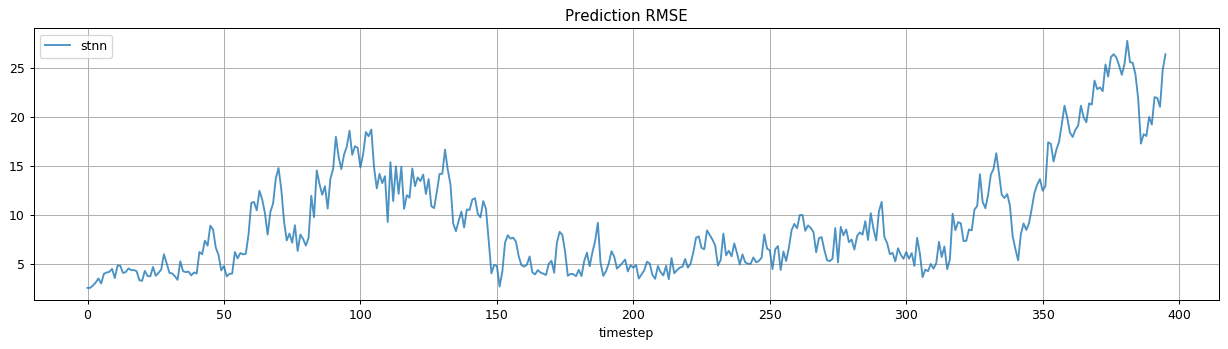

In [7]:
plt.figure('Test plots', figsize=(17, 4), dpi=90)
for exp in exps:
    with open(os.path.join(outputdir, exp, 'logs.json'), 'r') as f:
        logs = json.load(f)

    plt.plot([logs['test_epoch.ts.{}.rmse'.format(ts)][-1] for ts in range(396)], label=exp, alpha=0.8)

plt.grid()
plt.title('Prediction RMSE')
plt.xlabel('timestep')
plt.legend()

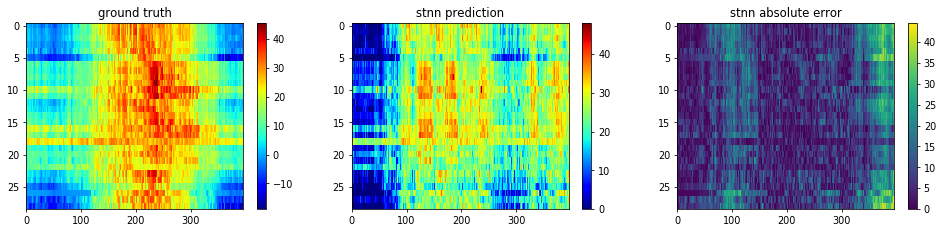

In [8]:
plt.figure('Results', figsize=(17, 12), dpi=70)

plt.subplot(3, 3, 1)
plt.imshow(test_data.squeeze().numpy().T, aspect='auto', cmap='jet')
plt.colorbar()
plt.title('ground truth')

for i, exp in enumerate(exps):
    plt.subplot(3, 3, i * 3 + 2 + i // 3)
    plt.imshow(predictions[exp].squeeze().numpy().T, aspect='auto', cmap='jet')
    plt.colorbar()
    plt.title('{} prediction'.format(exp))

    plt.subplot(3, 3, i * 3 + 3 + i // 3)
    plt.imshow(test_data.sub(predictions[exp]).abs().squeeze().numpy().T, aspect='auto')
    plt.colorbar()
    plt.title('{} absolute error'.format(exp))